In [2]:
#Applying the GNB and getting the accuracy and confusion matrix

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# load dataset
dataframe = pandas.read_table('/content/completeallwithNode.txt')
data = dataframe.drop("No.", axis=1)
# data = data.drop("StdPageRank", axis=1)
# data = data.drop("VarPageRank", axis=1)
dataset = data.values



# split into input (X) and output (Y) variables


l = 18565+659+19194+23108+18328
X = dataset[:,0:]
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'T':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]




# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                            labels,
                                                            test_size=0.33,
                                                            random_state= 42)#

  # Initialize our classifier
gnb = GaussianNB()

  # Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

print("Attackfreee")
print(test_labels.count(0))
print("Attacked")
print(test_labels.count(1))
  
  # Evaluate accurac
print(accuracy_score(test_labels, preds))

cm = confusion_matrix(test_labels, preds)

cm = cm.T

print(cm)



Attackfreee
18142
Attacked
8210
0.9810640558591378
[[18058   415]
 [   84  7795]]


[6.20123975e-02 6.14363534e-02 1.45313381e-01 1.00181579e-04
 1.46578173e-01 2.17769708e-02 6.29015090e-02 1.32815729e-01
 2.25408553e-04]


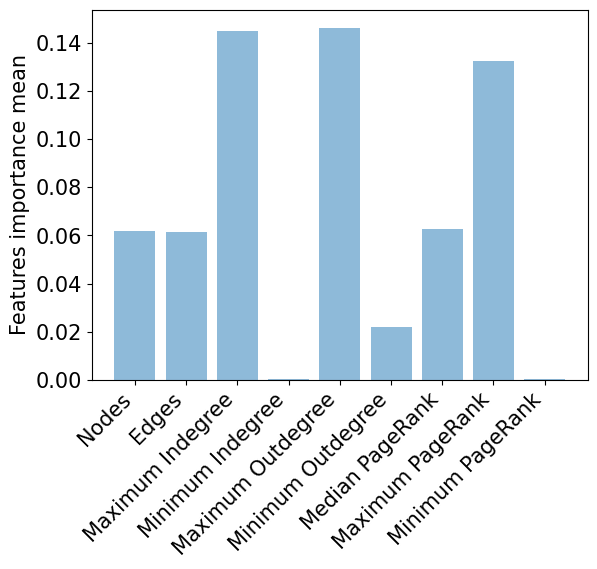

In [3]:
#Getting the feature importacne
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)
an = ["Nodes","Edges","Maximum Indegree","Minimum Indegree","Maximum Outdegree","Minimum Outdegree", "Median PageRank",
      "Maximum PageRank","Minimum PageRank"]
plt.bar(an, np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=45, ha ='right', fontsize = 15)
plt.ylabel('Features importance mean', fontsize = 15)
plt.tick_params(labelsize=15)
#plt.savefig('feature_importance.PNG', bbox_inches = "tight")
#plt.savefig('feature_importance.svg', bbox_inches = "tight")
#plt.savefig('feature_importance.pdf', bbox_inches = "tight")


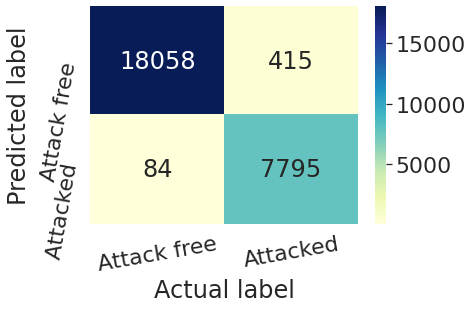

In [5]:
#Getting the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline




cm_matrix = pd.DataFrame(data=cm, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
#plt.savefig('confusion_.pdf', bbox_inches = "tight")
# plt.savefig('confusion_.PNG', bbox_inches = "tight")
# plt.savefig('confusion_.svg', bbox_inches = "tight")

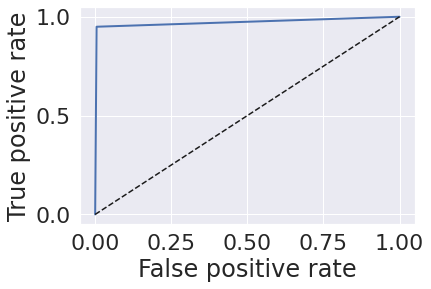

In [ ]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.savefig('roc_curve.pdf', bbox_inches = "tight")
# plt.savefig('roc_curve.PNG', bbox_inches = "tight")
# plt.savefig('roc_curve.svg', bbox_inches = "tight")

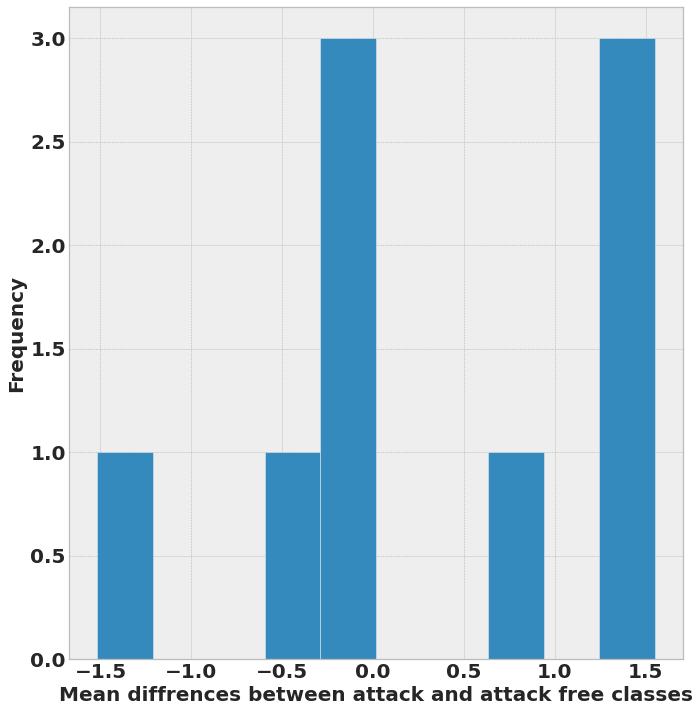

In [28]:
#Mean difference between attack and attackfree

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,12))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X_train))


#print(transformed[y_train == True].mean() - transformed[y_train == False].mean())
plt.hist(transformed[y_train == 'F'].mean() - transformed[y_train == 'T'].mean())

f = 20
plt.ylabel('Frequency', fontsize = f, fontweight = 'bold')
plt.xlabel('Mean diffrences between attack and attack free classes', fontsize = f, fontweight = 'bold')
plt.tick_params(labelsize=f)
# plt.title('Histogram of sample mean differences between two classes', **title_config)
plt.savefig("mean_difference.png", bbox_inches = "tight")
plt.savefig("mean_difference.svg", bbox_inches = "tight")
plt.savefig("mean_difference.pdf", bbox_inches = "tight")

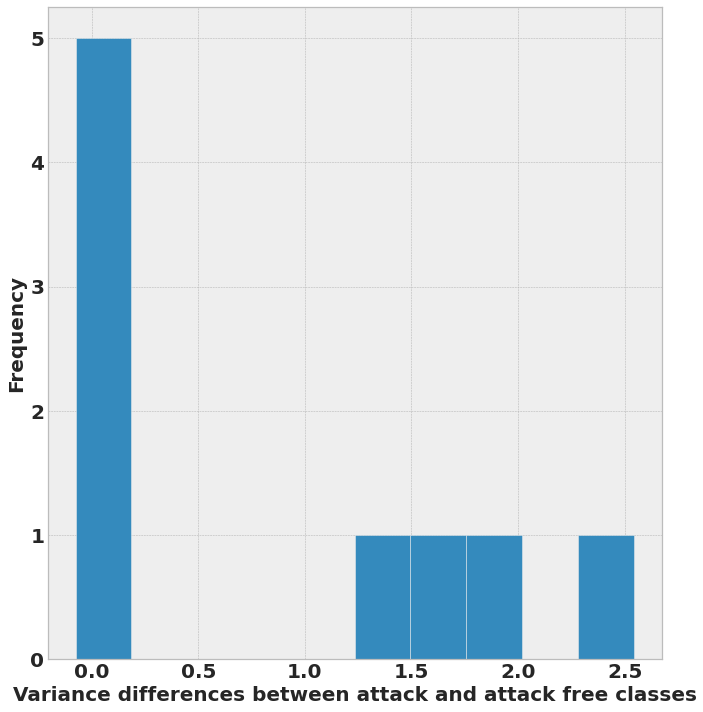

In [29]:
#Variance difference between attack free and attack
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,12))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

plt.hist(transformed[y_train == 'F'].var() - transformed[y_train == 'T'].var())
f = 20
plt.xlabel('Variance differences between attack and attack free classes', fontsize = f, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = f, fontweight = 'bold')
plt.tick_params(labelsize=f)
plt.savefig("variance_diference.png", bbox_inches = "tight")
plt.savefig("variance_diference.svg", bbox_inches = "tight")
plt.savefig("variance_diference.pdf", bbox_inches = "tight")

2
4


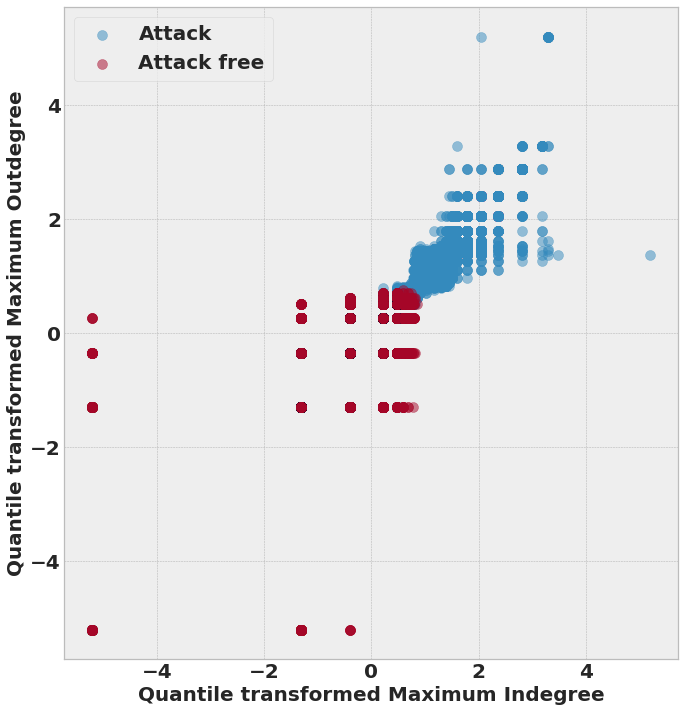

In [32]:
#Least variance features plotting using transformed features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,12))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values
select = (transformed[y_train == 'F'].var() - transformed[y_train == 'T'].var()).nsmallest(2).index

print(select[0])
print(select[1])

plt.scatter(transformed.loc[y_train == 'F', select[0]], transformed.loc[y_train == 'F', select[1]], alpha=0.5, label='Attack', s = 100)
plt.scatter(transformed.loc[y_train == 'T', select[0]], transformed.loc[y_train == 'T', select[1]], alpha=0.5, label='Attack free', s = 100)

f = 20
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = f, fontweight = 'bold')
plt.xlabel("Quantile transformed Maximum Indegree", fontsize = f, fontweight = 'bold')
plt.tick_params(labelsize=f)
plt.rcParams["font.weight"] = "bold"
plt.legend(fontsize = 20)

plt.savefig("higherSampleVariance.pdf", bbox_inches = "tight")
plt.savefig("higherSampleVariance.png", bbox_inches = "tight")
plt.savefig("higherSampleVariance.svg", bbox_inches = "tight")

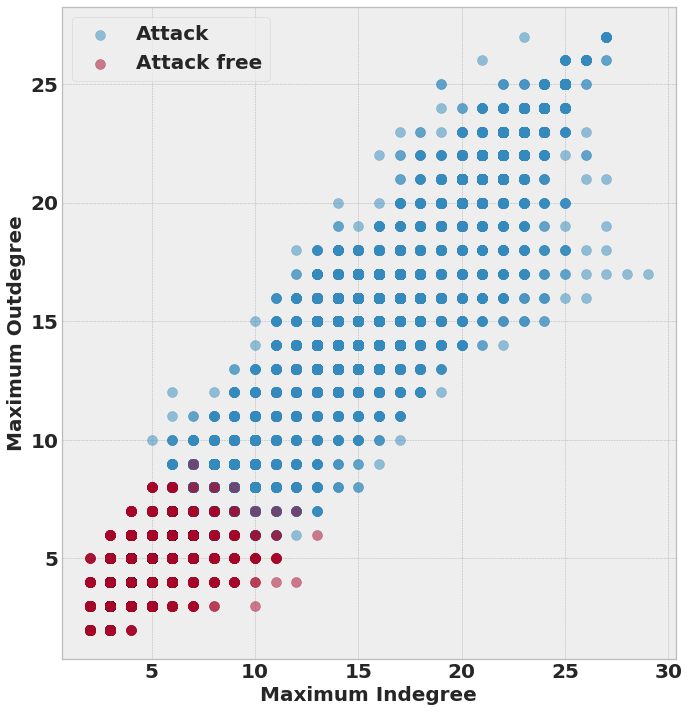

In [34]:
#Least variance features plotting using orginal features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(11,12))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values



plt.scatter(X_train[y_train == 'F', select[0]], X_train[y_train == 'F', select[1]], alpha=0.5, label='Attack', s= 100)
plt.scatter(X_train[y_train == 'T', select[0]], X_train[y_train == 'T', select[1]], alpha=0.5, label='Attack free', s= 100)
plt.xlabel(str(data.columns[select[0]]))
plt.ylabel(str(data.columns[select[1]]))
#plt.title('Bounds in Data', **title_config)

f = 20

plt.xlabel("Maximum Indegree", fontsize = f, fontweight = 'bold')
plt.ylabel("Maximum Outdegree", fontsize = f, fontweight = 'bold')
plt.tick_params(labelsize=f)
plt.rcParams["font.weight"] = "bold"
plt.legend(fontsize = 20)


plt.savefig("bounds_in_data.png", bbox_inches = "tight")
plt.savefig("bounds_in_data.svg", bbox_inches = "tight")
plt.savefig("bounds_in_data.pdf", bbox_inches = "tight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

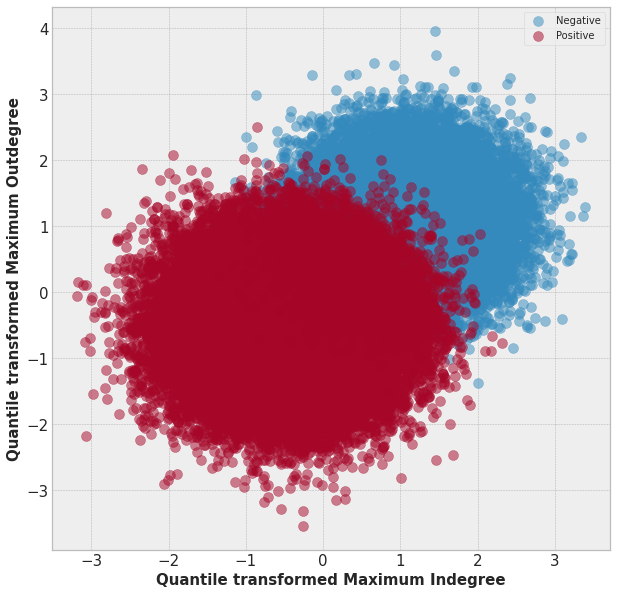

In [ ]:
#Gaussian distribution plotting
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,10))
title_config = {'fontsize': 20, 'y': 1.05}

X_train = data.iloc[:, 0:9].values.astype('float64')
y_train = data['State'].values

size0 = (y_train == 'F').sum()
size1 = y_train.size - size0

x0 = np.random.normal(transformed.loc[y_train == 'F', select[0]].mean(),
                      transformed.loc[y_train == 'F', select[0]].std(), size=size0)

y0 = np.random.normal(transformed.loc[y_train == 'F', select[1]].mean(),
                      transformed.loc[y_train == 'F', select[1]].std(), size=size0)
x1 = np.random.normal(transformed.loc[y_train == 'T', select[0]].mean(),
                      transformed.loc[y_train == 'T', select[0]].std(), size=size1)

y1 = np.random.normal(transformed.loc[y_train == 'T', select[1]].mean(),
                      transformed.loc[y_train == 'T', select[1]].std(), size=size1)

plt.scatter(x0, y0, alpha=0.5, label='Negative', s= 100)
plt.scatter(x1, y1, alpha=0.5, label='Positive', s= 100)

plt.xlabel("Quantile transformed Maximum Indegree", fontsize = 15, fontweight = 'bold')
plt.ylabel("Quantile transformed Maximum Outdegree", fontsize = 15, fontweight = 'bold')
plt.tick_params(labelsize=15)

plt.legend(fontsize = 10)
plt.savefig("simulated_data.png", bbox_inches = "tight")
# plt.savefig("simulated_data.pdf", bbox_inches = "tight")
# plt.savefig("simulated_data.svg", bbox_inches = "tight")